In [1]:
import pandas as pd
import datetime
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit

In [2]:
file_url="covid_19_data.csv"

df=pd.read_csv(file_url)

In [3]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2938,2939,03/01/2020,"Tempe, AZ",US,2020-02-25T21:23:03,1.0,0.0,1.0
2939,2940,03/01/2020,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
2940,2941,03/01/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
2941,2942,03/01/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
2942,2943,03/01/2020,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [4]:
countries_list=df['Country/Region'].unique()

countries_list

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic'], dtype=object)

In [5]:
corona_study={}
corona_average_daily_growth={}

for country in countries_list:
    df_country=df[df['Country/Region']==country]
    
    df_country_by_date=df_country.groupby(['ObservationDate']).sum()
    
    corona_study[country]={}
    corona_study[country]['confirmed']=df_country_by_date['Confirmed'].max()
    corona_study[country]['death']=df_country_by_date['Deaths'].max()
    corona_study[country]['recovered']=df_country_by_date['Recovered'].max()
    
    confirmed_series=list(df_country_by_date['Confirmed'])
    corona_average_daily_growth[country]=np.mean(np.diff(confirmed_series))

C:\Users\vjib\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\vjib\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [15]:
corona_study['China'] = corona_study.pop('Mainland China')
corona_study['United States of America'] = corona_study.pop('US')
corona_study['United Kingdom'] = corona_study.pop('UK')
corona_study['Dominican Rep.'] = corona_study.pop('Dominican Republic')
corona_study['Czechia'] = corona_study.pop('Czech Republic')

corona_average_daily_growth['China'] = corona_average_daily_growth.pop('Mainland China')
corona_average_daily_growth['United States of America'] = corona_average_daily_growth.pop('US')
corona_average_daily_growth['United Kingdom'] = corona_average_daily_growth.pop('UK')
corona_average_daily_growth['Dominican Rep.'] = corona_average_daily_growth.pop('Dominican Republic')
corona_average_daily_growth['Czechia'] = corona_average_daily_growth.pop('Czech Republic')

KeyError: 'Mainland China'

In [ ]:
corona_study

In [16]:
corona_average_daily_growth

{'Hong Kong': 2.4615384615384617,
 'Macau': 0.23076923076923078,
 'Taiwan': 1.0,
 'Japan': 6.512820512820513,
 'Thailand': 1.0256410256410255,
 'South Korea': 95.76923076923077,
 'Singapore': 2.763157894736842,
 'Philippines': 0.09375,
 'Malaysia': 0.7837837837837838,
 'Vietnam': 0.3684210526315789,
 'Australia': 0.7297297297297297,
 'Mexico': 1.6666666666666667,
 'Brazil': 0.4,
 'Colombia': nan,
 'France': 3.4594594594594597,
 'Nepal': 0.0,
 'Canada': 0.6571428571428571,
 'Cambodia': 0.0,
 'Sri Lanka': 0.0,
 'Ivory Coast': nan,
 'Germany': 3.8181818181818183,
 'Finland': 0.15625,
 'United Arab Emirates': 0.53125,
 'India': 0.06451612903225806,
 'Italy': 56.4,
 'Russia': 0.0,
 'Sweden': 0.43333333333333335,
 'Spain': 2.8620689655172415,
 'Belgium': 0.038461538461538464,
 'Others': 28.0,
 'Egypt': 0.0625,
 'Iran': 88.72727272727273,
 'Israel': 1.0,
 'Lebanon': 1.0,
 'Iraq': 2.7142857142857144,
 'Oman': 0.6666666666666666,
 'Afghanistan': 0.0,
 'Bahrain': 7.666666666666667,
 'Kuwait': 7.

In [17]:
import geopandas as  gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['confirmed'] = 0
world['death'] = 0
world['recovered'] = 0
world['daily_growth']=0

In [18]:
for country,row in corona_study.items():
    if (len(world.loc[world['name'] == country])>0):
        country_index=world.loc[world['name'] == country].index[0]
        world.at[country_index,'confirmed']=math.log(corona_study[country]['confirmed']+1)
        world.at[country_index,'death']=math.log(corona_study[country]['death']+1)
        world.at[country_index,'recovered']=math.log(corona_study[country]['recovered']+1)
        if (not math.isnan(corona_average_daily_growth[country])):
            world.at[country_index,'daily_growth']=math.log(corona_average_daily_growth[country]+1)
    else:
        print(country)

Hong Kong
Macau
Singapore
Ivory Coast
Others
Bahrain
North Macedonia
San Marino
 Azerbaijan
North Ireland
Monaco
Czech Republic
Dominican Republic


In [19]:
world['death_rate']=world['death']/world['confirmed']
world['recovered_rate']=world['recovered']/world['confirmed']

Text(0.5, 1.0, 'Visualization of Confirmed case map')

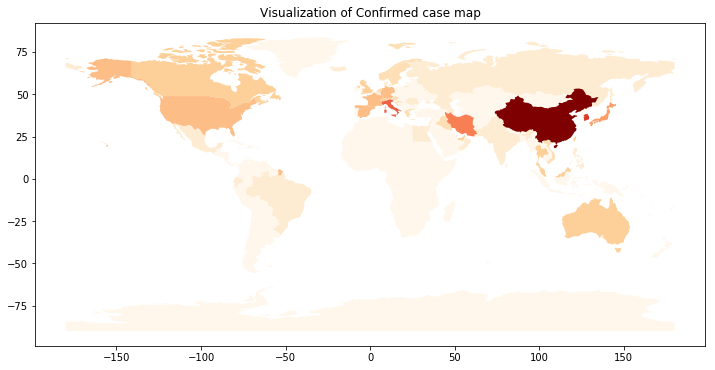

In [20]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='confirmed', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Confirmed case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Death case map')

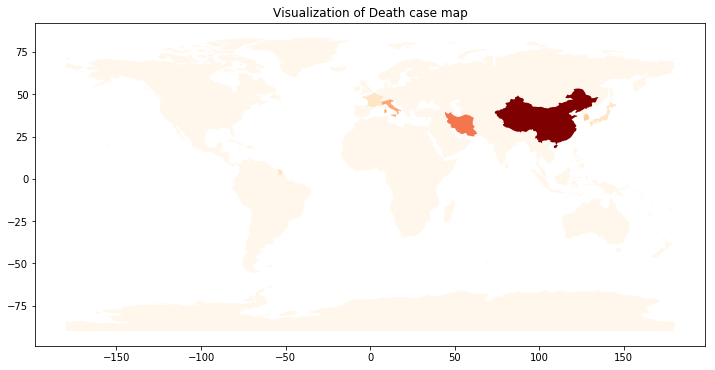

In [21]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='death', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Death case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Recovered case map')

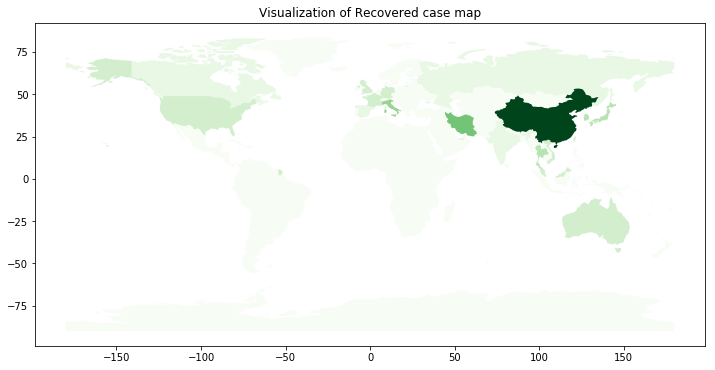

In [22]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='recovered', cmap='Greens',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Recovered case map", fontsize=12)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'Visualization of death rate map')

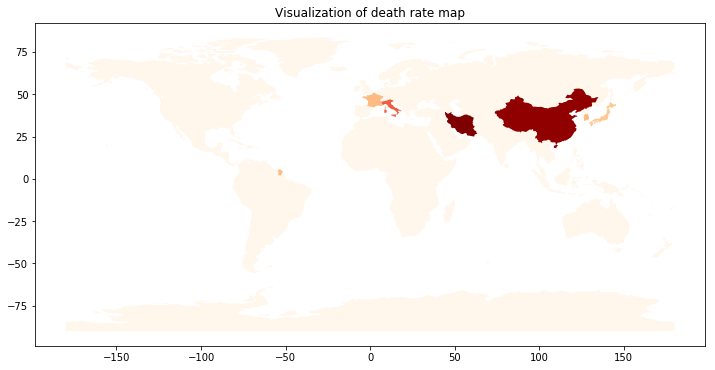

In [23]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='death_rate', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of death rate map", fontsize=12)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'Visualization of recovered rate map')

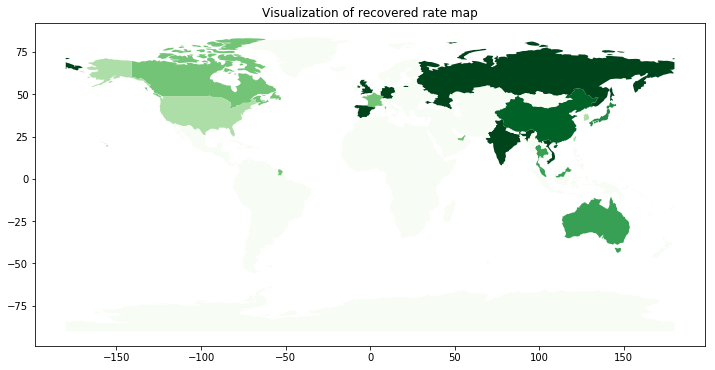

In [16]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='recovered_rate', cmap='Greens',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of recovered rate map", fontsize=12)

Text(0.5, 1.0, 'Visualization of daily growth of confirmed case map')

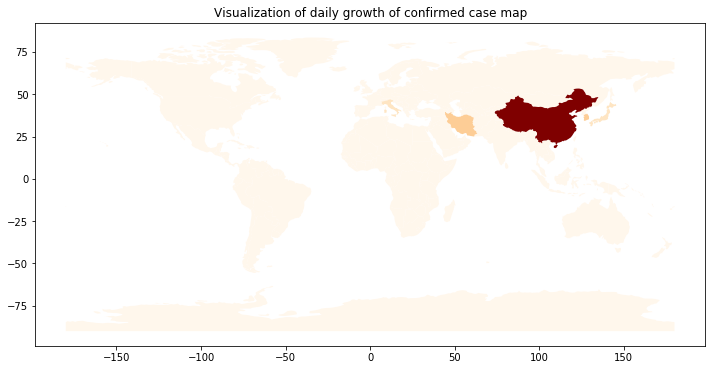

In [17]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='daily_growth', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of daily growth of confirmed case map", fontsize=12) 